### Two Body Simulation

A worksheet to simulate two spiraling black holes, using Post-Minkowski corrections to accounts for effects of relativity.

In [1]:
using DifferentialEquations
using Plots

In [2]:
#This cell contains the derivative of the Hamiltonian, used to calculate change in position and change in momentum

function Hamiltonian(du, u, p, t)
    x1 = u[1]
    y1 = u[2]
    p1x = u[3]
    p1y = u[4]
    x2 = u[5]
    y2 = u[6]
    p2x = u[7]
    p2y = u[8]
    
    m1 = p[1]
    m2 = p[2]
    G = p[3]

	difX, difY = x2 - x1, y2 - y1
	r = (((difX ^ 2) + (difY ^ 2)) ^ 1.5)
	top = G * m1 * m2
    
	du[1], du[2] = p1x / m1, p1y / m1
	du[3], du[4] = top * difX / r, top * difY / r
    
	du[5], du[6] = p2x / m2, p2y / m2
	du[7], du[8] = - top * difX / r, - top * difY / r
end

Hamiltonian (generic function with 1 method)

In [92]:
## This cell is for setting the parameters of the code

m1 = 10; # Mass of the first body in solar masses
m2 = 25; # Mass of the second body
D = 5; # Initial separation of the bodies, in kilometers
ecc = 0.7; # eccentricity of the orbits
G = 1; # Gravitational constant

In [93]:
## Calculates factors based on eccentricity

if !(0 <= ecc <= 1)
    ecc = 0.0
end
qfac = 1 - ecc;
pfac = sqrt((1 + ecc)/(1 - ecc));

In [94]:
## Calculates inital position and momentum

mu = m1 * m2 / (m1 + m2)
p_theta = sqrt(G * m1 * m2 * mu * D )

x2 = D / (1 + (m1 / m2));
x1 = x2 - D;
py2 = p_theta / D;
py1 = -py2;

In [95]:
c0 = [m1, m2, G]
q01 = [x1 * qfac, 0.0]
p01 = [0.0, py1 * pfac]
q02 = [x2 * qfac, 0.0]
p02 = [0.0, py2 * pfac]
u0 = collect(Base.Iterators.flatten([q01, p01, q02, p02]));

In [96]:
tspan = (0.0, 100.0)

(0.0, 100.0)

In [97]:
prob = ODEProblem(Hamiltonian, u0, tspan, c0)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [-0.4285714285714286, 0.0, 0.0, -44.98677054212187, 1.0714285714285716, 0.0, 0.0, 44.98677054212187]

In [98]:
sol = solve(prob, RK4(), adaptive = true, reltol = 1.0e-8, abstol = 1.0e-8, saveat = 0.1);

In [99]:
ss1 = sol[1,:]
ss2 = sol[2,:]
ss3 = sol[5,:]
ss4 = sol[6,:];

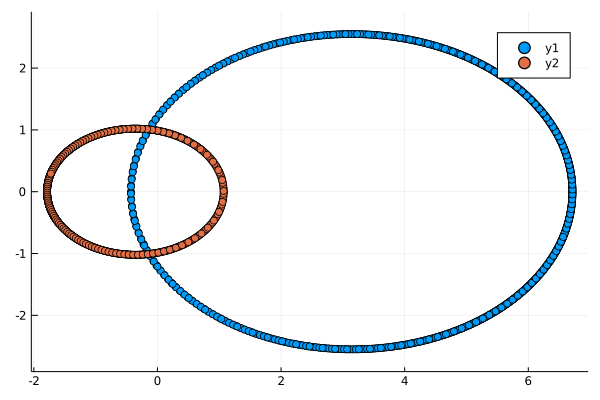

In [100]:
scatter(ss1, ss2, aspect_ratio = :equal);
scatter!(ss3, ss4, aspect_ratio = :equal)

In [101]:
#Got this from a website, doesn't quite work right for what I need. Try to fix this.
@userplot CirclePlot
@recipe function f(cp::CirclePlot)
    x, y, i = cp.args
    n = 150
    inds = circshift(1:n, 1 - i)
    linewidth --> range(0, 10, length = n)
    seriesalpha --> range(0, 1, length = n)
    aspect_ratio --> 1
    label --> false
    x[inds], y[inds]
end

#=anim1 = @animate for i ∈ 1:n
    circleplot(ss1, ss2, i)
end
anim2 = @animate for i ∈ 1:n
    circleplot(ss3, ss4, i)
end=#

┌ Info: Saved animation to 
│   fn = /Users/zackarywindham/Research/grav_waves/tmp.gif
└ @ Plots /Users/zackarywindham/.julia/packages/Plots/E3MWZ/src/animation.jl:104


Plots.AnimatedGif("/Users/zackarywindham/Research/grav_waves/tmp.gif")
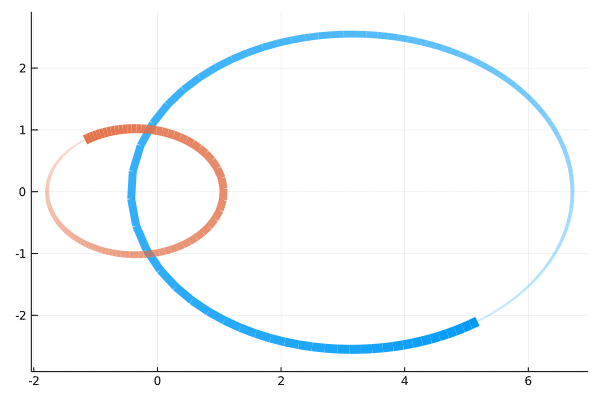

In [104]:
@gif for i = 1:size(ss1)[1]
    circleplot(ss1, ss2, i)
    circleplot!(ss3, ss4, i)
    end every 5

In [ ]:
plt = plot(
    1,
    xlim = (-4, 4),
    ylim = (-4, 4),
    title = "Two Body Problem",
    aspect_ratio = :equal,
)

@gif for i = 1:size(ss1)[1]
    push!(plt, ss1[i], ss2[i])
end every 10